In [1]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

#1. create a dataframe

In [2]:
df = pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        0 non-null      object
 1   Open        0 non-null      object
 2   High        0 non-null      object
 3   Low         0 non-null      object
 4   Close       0 non-null      object
 5   Volume      0 non-null      object
 6   Market Cap  0 non-null      object
dtypes: object(7)
memory usage: 124.0+ bytes


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap


#2. Add data

In [5]:
dates = [datetime(2024, 3, 1) + timedelta(days=i) for i in range(61)]   # from 1st march 2024 to 30th april 2024 (2 months)
dates = [date.strftime('%d-%m-%Y') for date in dates]

In [6]:
open_price = np.random.uniform(35000, 50000, size=61) # random open price ranging from 35000 to 50000

high_price = np.random.uniform(open_price, 55000, size=61)  # random high price ranging from open price to 55000

close_price = np.roll(open_price, -1)  # close price is the next day's open price

low_price = np.random.uniform(32000, close_price, size=61)  # random low price ranging from 32000 to close price

volume = np.random.randint(1000000, 5000000, size=61) # random volume ranging from 1000000 to 5000000

market_cap = np.random.randint(100000000000, 200000000000, size=61) # random market cap ranging from 100000000000 to 200000000000

In [7]:
df['Date'] = dates
df['Open'] = open_price
df['High'] = high_price
df['Low'] = low_price
df['Close'] = close_price
df['Volume'] = volume
df['Market Cap'] = market_cap

In [8]:
# the last day's Close price to be between Open and High
df.iloc[-1, df.columns.get_loc('Close')] = np.random.uniform(df.iloc[-1, df.columns.get_loc('Open')], df.iloc[-1, df.columns.get_loc('High')])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        61 non-null     object 
 1   Open        61 non-null     float64
 2   High        61 non-null     float64
 3   Low         61 non-null     float64
 4   Close       61 non-null     float64
 5   Volume      61 non-null     int64  
 6   Market Cap  61 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 3.5+ KB


In [10]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,01-03-2024,49811.850140,50270.018605,32479.001025,42810.640789,3241691,156556210954
1,02-03-2024,42810.640789,44495.486209,33885.303184,35794.256962,2774608,117018939920
2,03-03-2024,35794.256962,54827.512806,46844.762241,49784.086892,1842052,158464565603
3,04-03-2024,49784.086892,51630.130005,45587.015222,49072.409284,3941997,170044446042
4,05-03-2024,49072.409284,53936.053838,32075.978822,49590.417991,3628836,126177755156


In [11]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
56,26-04-2024,44491.898819,50249.950266,36511.102481,38060.223146,3682015,128151364716
57,27-04-2024,38060.223146,40095.152745,35364.504316,48033.377765,3049466,117071174423
58,28-04-2024,48033.377765,51708.914427,33479.619117,38065.087548,2482083,110746107883
59,29-04-2024,38065.087548,50238.075291,35286.387681,43703.508242,4350778,175329811705
60,30-04-2024,43703.508242,52903.642045,39257.330613,47040.634779,1454109,142784242625


In [12]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [13]:
df.sort_values(by='Date', inplace=True)

In [14]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-03-01,49811.850140,50270.018605,32479.001025,42810.640789,3241691,156556210954
1,2024-03-02,42810.640789,44495.486209,33885.303184,35794.256962,2774608,117018939920
2,2024-03-03,35794.256962,54827.512806,46844.762241,49784.086892,1842052,158464565603
3,2024-03-04,49784.086892,51630.130005,45587.015222,49072.409284,3941997,170044446042
4,2024-03-05,49072.409284,53936.053838,32075.978822,49590.417991,3628836,126177755156


In [15]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
56,2024-04-26,44491.898819,50249.950266,36511.102481,38060.223146,3682015,128151364716
57,2024-04-27,38060.223146,40095.152745,35364.504316,48033.377765,3049466,117071174423
58,2024-04-28,48033.377765,51708.914427,33479.619117,38065.087548,2482083,110746107883
59,2024-04-29,38065.087548,50238.075291,35286.387681,43703.508242,4350778,175329811705
60,2024-04-30,43703.508242,52903.642045,39257.330613,47040.634779,1454109,142784242625


#3. EDA

In [16]:
df.describe()  # descriptive statistics

,Date,Open,High,Low,Close,Volume,Market Cap
count,61,61.000000,61.000000,61.000000,61.000000,6.100000e+01,6.100000e+01
mean,2024-03-31 00:00:00,43076.217875,48927.424310,37305.181049,43030.788115,3.156462e+06,1.524652e+11
min,2024-03-01 00:00:00,35024.626633,39152.286329,32075.978822,35024.626633,1.194143e+06,1.013337e+11
25%,2024-03-16 00:00:00,38659.489130,45792.388435,34242.023035,38659.489130,2.482083e+06,1.238515e+11
50%,2024-03-31 00:00:00,43390.550422,50249.950266,36459.645320,43390.550422,3.227285e+06,1.583493e+11
75%,2024-04-15 00:00:00,47095.215767,52693.458652,39633.204015,47040.634779,3.904503e+06,1.767525e+11
max,2024-04-30 00:00:00,49811.850140,54876.710292,48182.708435,49807.198102,4.835192e+06,1.984260e+11
std,NaN,4580.927607,4430.899457,3984.229774,4526.433158,1.019209e+06,3.030627e+10


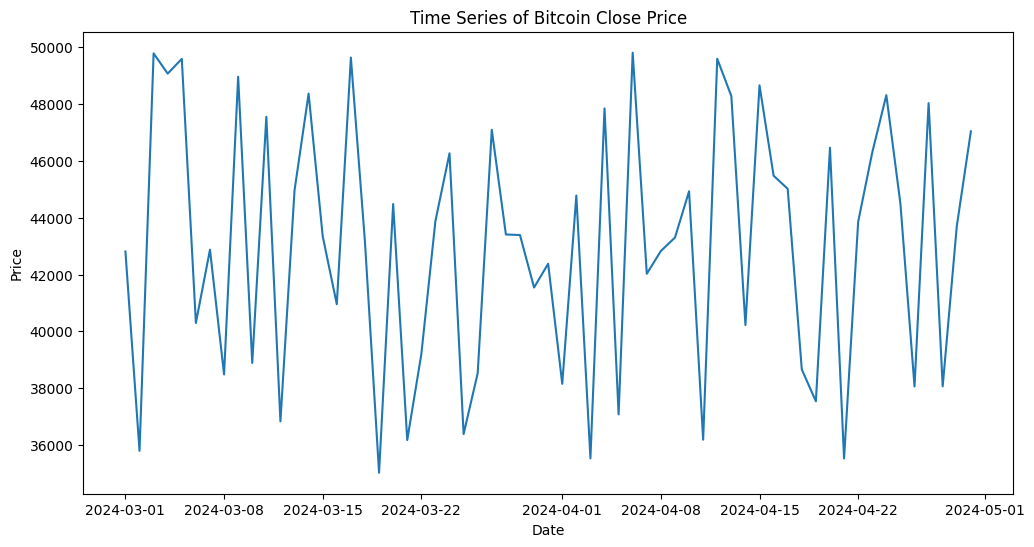

In [17]:
# plot a time series of the Close price of Bitcoin
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Time Series of Bitcoin Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<ipython-input-18-a1c7f263d92c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Volume'], kde=False)


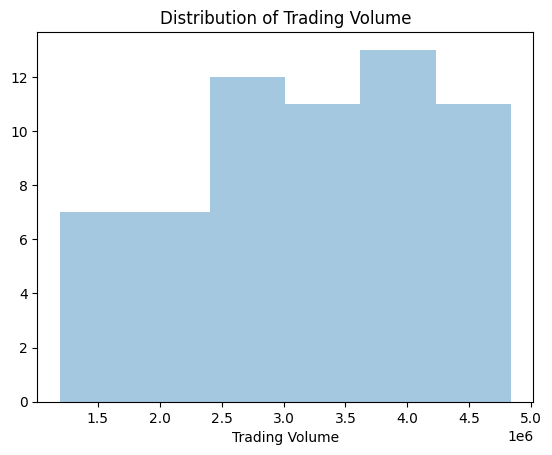

In [18]:
# plot the distribution of the Volume
sns.distplot(df['Volume'], kde=False)
plt.title('Distribution of Trading Volume')
plt.xlabel('Trading Volume')
plt.show()

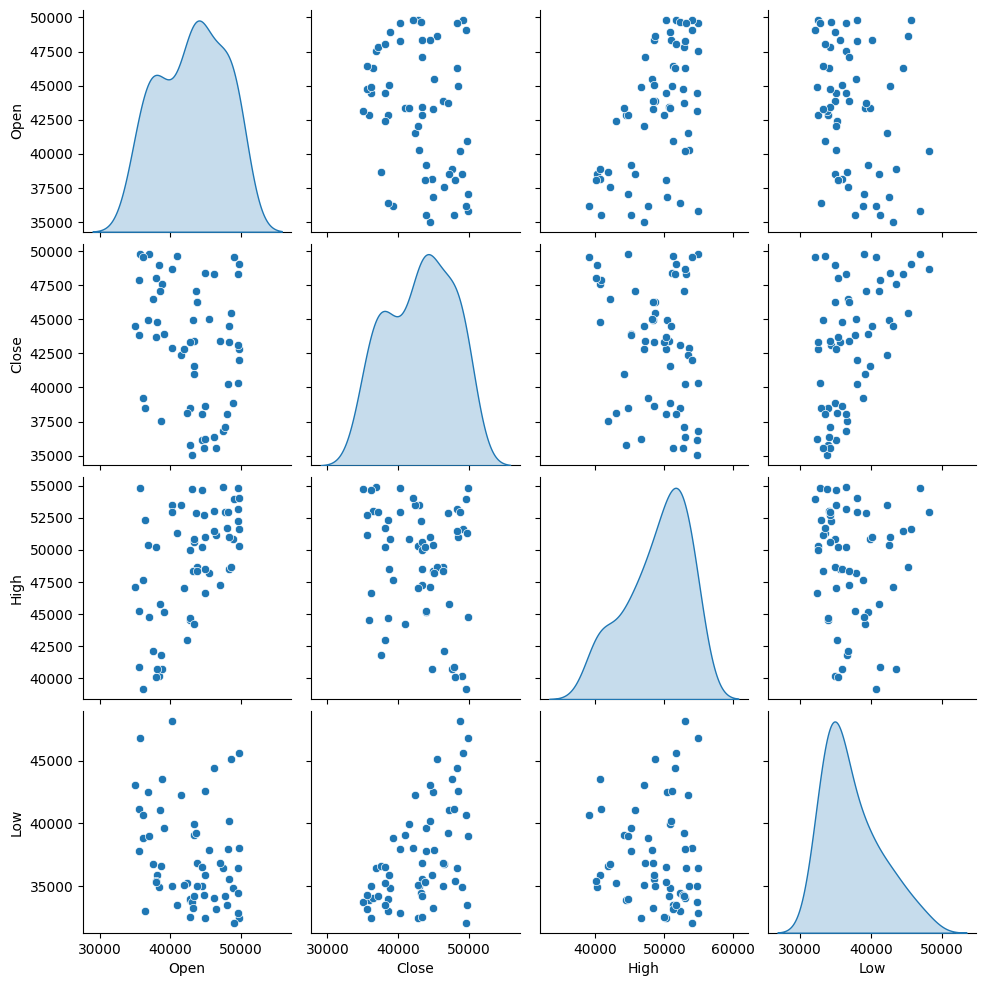

In [20]:
#a pair plot to show the relationship between Open, Close, High, and Low
sns.pairplot(df[['Open', 'Close', 'High', 'Low']], diag_kind='kde')
plt.show()

In [21]:
# correlation between Open, High, Low, Close, and Volume
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.548874 -0.266054 -0.266896 -0.010400
High    0.548874  1.000000 -0.055758 -0.234199 -0.200958
Low    -0.266054 -0.055758  1.000000  0.518114  0.195496
Close  -0.266896 -0.234199  0.518114  1.000000  0.203211
Volume -0.010400 -0.200958  0.195496  0.203211  1.000000


#4. Applying filtering conditions

In [22]:
filtered_rows = df[(df['Close'] > df['Open'])]  # filter the rows where Close price is greater than the Open price

In [23]:
filtered_volume = df[(df['Volume'] > df['Volume'].mean())] # filter the rows where The trading volume was higher than the average trading volume

In [24]:
filtered_both=df[(df['Close'] > df['Open']) & (df['Volume'] > df['Volume'].mean())] # filter the rows for both conditions

In [25]:
filtered_rows

,Date,Open,High,Low,Close,Volume,Market Cap
2,2024-03-03,35794.256962,54827.512806,46844.762241,49784.086892,1842052,158464565603
4,2024-03-05,49072.409284,53936.053838,32075.978822,49590.417991,3628836,126177755156
6,2024-03-07,40294.716034,53520.276517,35037.615831,42874.499349,4205220,184718812486
8,2024-03-09,38483.348518,40182.357294,34897.958128,48963.200092,3607570,170243786725
10,2024-03-11,38888.111390,40709.874137,43517.905169,47552.463451,3227285,185381126162
12,2024-03-13,36832.381753,50369.641367,42469.909319,44959.366185,4682455,193186395210
13,2024-03-14,44959.366185,51038.290002,42598.325514,48368.547423,4377602,173937532380
16,2024-03-17,40955.273630,51290.361036,33500.226120,49637.074028,3802537,113520249209
19,2024-03-20,35024.626633,47065.241292,43049.246035,44481.855821,3904503,138359863403
21,2024-03-22,36174.141399,47662.869416,38827.854143,39195.908445,2290606,107162021620


In [26]:
filtered_volume

,Date,Open,High,Low,Close,Volume,Market Cap
0,2024-03-01,49811.850140,50270.018605,32479.001025,42810.640789,3241691,156556210954
3,2024-03-04,49784.086892,51630.130005,45587.015222,49072.409284,3941997,170044446042
4,2024-03-05,49072.409284,53936.053838,32075.978822,49590.417991,3628836,126177755156
6,2024-03-07,40294.716034,53520.276517,35037.615831,42874.499349,4205220,184718812486
7,2024-03-08,42874.499349,44667.621578,33967.606794,38483.348518,4635827,145383305793
8,2024-03-09,38483.348518,40182.357294,34897.958128,48963.200092,3607570,170243786725
9,2024-03-10,48963.200092,50852.564379,34868.564323,38888.111390,3351618,176462025858
10,2024-03-11,38888.111390,40709.874137,43517.905169,47552.463451,3227285,185381126162
12,2024-03-13,36832.381753,50369.641367,42469.909319,44959.366185,4682455,193186395210
13,2024-03-14,44959.366185,51038.290002,42598.325514,48368.547423,4377602,173937532380


In [27]:
filtered_both

,Date,Open,High,Low,Close,Volume,Market Cap
4,2024-03-05,49072.409284,53936.053838,32075.978822,49590.417991,3628836,126177755156
6,2024-03-07,40294.716034,53520.276517,35037.615831,42874.499349,4205220,184718812486
8,2024-03-09,38483.348518,40182.357294,34897.958128,48963.200092,3607570,170243786725
10,2024-03-11,38888.111390,40709.874137,43517.905169,47552.463451,3227285,185381126162
12,2024-03-13,36832.381753,50369.641367,42469.909319,44959.366185,4682455,193186395210
13,2024-03-14,44959.366185,51038.290002,42598.325514,48368.547423,4377602,173937532380
16,2024-03-17,40955.273630,51290.361036,33500.226120,49637.074028,3802537,113520249209
19,2024-03-20,35024.626633,47065.241292,43049.246035,44481.855821,3904503,138359863403
22,2024-03-23,39195.908445,45173.224924,39633.204015,43888.027793,3916559,119056627656
34,2024-04-04,35529.646633,40873.659037,41182.035353,47846.196049,3547297,194477447900


#5. For Loop and Conditional Statements

In [28]:
df['Price Change'] = df['Close'] - df['Open']  # create Price Change column

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          61 non-null     datetime64[ns]
 1   Open          61 non-null     float64       
 2   High          61 non-null     float64       
 3   Low           61 non-null     float64       
 4   Close         61 non-null     float64       
 5   Volume        61 non-null     int64         
 6   Market Cap    61 non-null     int64         
 7   Price Change  61 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 3.9 KB


In [30]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Price Change
0,2024-03-01,49811.850140,50270.018605,32479.001025,42810.640789,3241691,156556210954,-7001.209351
1,2024-03-02,42810.640789,44495.486209,33885.303184,35794.256962,2774608,117018939920,-7016.383827
2,2024-03-03,35794.256962,54827.512806,46844.762241,49784.086892,1842052,158464565603,13989.829930
3,2024-03-04,49784.086892,51630.130005,45587.015222,49072.409284,3941997,170044446042,-711.677608
4,2024-03-05,49072.409284,53936.053838,32075.978822,49590.417991,3628836,126177755156,518.008707


In [31]:
for i in range(len(df)):                            # If the Close price is higher than the Open price, set the value to "Up." otherwise set the value to "Down" in Price trend column
    if df.loc[i, 'Close'] > df.loc[i, 'Open']:
        df.loc[i, 'Price Trend'] = 'Up'
    else:
        df.loc[i, 'Price Trend'] = 'Down'

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          61 non-null     datetime64[ns]
 1   Open          61 non-null     float64       
 2   High          61 non-null     float64       
 3   Low           61 non-null     float64       
 4   Close         61 non-null     float64       
 5   Volume        61 non-null     int64         
 6   Market Cap    61 non-null     int64         
 7   Price Change  61 non-null     float64       
 8   Price Trend   61 non-null     object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 4.4+ KB


In [33]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Price Change,Price Trend
0,2024-03-01,49811.850140,50270.018605,32479.001025,42810.640789,3241691,156556210954,-7001.209351,Down
1,2024-03-02,42810.640789,44495.486209,33885.303184,35794.256962,2774608,117018939920,-7016.383827,Down
2,2024-03-03,35794.256962,54827.512806,46844.762241,49784.086892,1842052,158464565603,13989.829930,Up
3,2024-03-04,49784.086892,51630.130005,45587.015222,49072.409284,3941997,170044446042,-711.677608,Down
4,2024-03-05,49072.409284,53936.053838,32075.978822,49590.417991,3628836,126177755156,518.008707,Up


In [34]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap,Price Change,Price Trend
56,2024-04-26,44491.898819,50249.950266,36511.102481,38060.223146,3682015,128151364716,-6431.675673,Down
57,2024-04-27,38060.223146,40095.152745,35364.504316,48033.377765,3049466,117071174423,9973.154619,Up
58,2024-04-28,48033.377765,51708.914427,33479.619117,38065.087548,2482083,110746107883,-9968.290217,Down
59,2024-04-29,38065.087548,50238.075291,35286.387681,43703.508242,4350778,175329811705,5638.420694,Up
60,2024-04-30,43703.508242,52903.642045,39257.330613,47040.634779,1454109,142784242625,3337.126537,Up
